# Map Visualisations

__Last Update: November 2022__

...

In [1]:
import folium
import folium.plugins as plugins
import geopandas
import pandas as pd
import seaborn as sns
import contextily as cx
import matplotlib.pyplot as plt

# from ipyleaflet import Map, Marker, basemaps

sns.set(
    context='notebook',
    style='white',
    palette='Set1',
    font_scale=.9,
    font='monospace'
)

## Read in collision data

`../data/london-crashes.csv` filter to serious and fatal collisions only.

In [7]:
# not a massive fan of the use of the term 'accidents'
collisions = pd.read_csv('../data/collisions-tolerance=20.csv')

collisions.rename(columns={'accident_index': 'id'}, inplace=True)

# collisions = collisions[collisions['max_cyclist_severity'] != 'slight']

# example rows
collisions.head()

,raw_collision_id,borough,easting,northing,location,collision_severity,junction_detail,date,time,year,...,latitude,fatal_cyclist_casualties,serious_cyclist_casualties,slight_cyclist_casualties,danger_metric,max_cyclist_severity,recency_danger_metric,distance_to_junction,junction_index,junction_id
0,1210287407,LAMBETH,530565,176602,"ON STOCKWELL TERRACE, NEAR THE JUNCTION WITH C...",serious,t_or_staggered_junction,2021-01-03,18:40:00,2021,...,51.473325,0,1,0,1,serious,1.079181,0.000016,91891.0,6956221327
1,1210287449,HACKNEY,533484,182295,"ON HOLYWELL LANE, NEAR THE JUNCTION WITH SHORE...",serious,multi_junction,2021-01-04,07:30:00,2021,...,51.523805,0,1,0,1,serious,1.079181,0.000018,84994.0,2584077858
2,1210287629,HOUNSLOW,513659,176845,"ON HESTON ROAD, NEAR THE JUNCTION WITH GREAT W...",serious,crossroads,2021-01-05,16:40:00,2021,...,51.479154,0,1,0,1,serious,1.079181,0.000135,28195.0,30963221
3,1210287717,WANDSWORTH,529051,171859,"ON TOOTING BEC ROAD, NEAR THE JUNCTION WITH NO...",serious,other_junction,2021-01-06,12:05:00,2021,...,51.431047,0,1,0,1,serious,1.079181,0.000021,70650.0,568381310
4,1210287778,CAMDEN,525313,183766,"ON KILBURN HIGH ROAD, NEAR THE JUNCTION WITH B...",serious,t_or_staggered_junction,2021-01-06,21:40:00,2021,...,51.538895,0,1,0,1,serious,1.079181,0.000108,78549.0,1569016984


## Plot heatmap

In [8]:
data = collisions[
    collisions['max_cyclist_severity'] != 'slight'
][['latitude', 'longitude', 'recency_danger_metric']].values.tolist()

mean_lon = collisions['longitude'].mean()
mean_lat = collisions['latitude'].mean()

m = folium.Map([mean_lat, mean_lon], zoom_start=11)

plugins.HeatMap(data, max_opacity=1, radius=20, blur=10).add_to(m)

m

In [12]:
collisions[['latitude', 'longitude']].head()

,latitude,longitude
0,51.473325,-0.121448
1,51.523805,-0.077292
2,51.479154,-0.364678
3,51.431047,-0.144963
4,51.538895,-0.194485


In [106]:
collisions['latitude'].min(), collisions['latitude'].max()

(51.30326617, 51.68094323)

In [107]:
collisions['longitude'].min(), collisions['longitude'].max()

(-0.49471706, 0.2839671)

In [158]:
from folium.features import DivIcon

m = folium.Map(tiles='cartodbpositron')
# folium.TileLayer('cartodbpositron').add_to(m)

iframe = folium.IFrame(
    html='''
        <style>
        body {
          font-family: Tahoma, sans-serif;
          font-size: 12px;
        }
        </style>
    ''' + 'some text',
    width=250,
    height=250
)

mark1 = folium.Marker(
    location=[51.473325, -0.121448],
    radius=10,    
    color='#f2f9bc',
    fill_color ='#f2f9bc',
    fill_opacity=0.7,
    z_index_offset=100
).add_to(m)

# mark2 = folium.map.Marker(
#     location=[51.473325, -0.121448],
#     popup=folium.Popup(iframe),
#     icon=DivIcon(
#         icon_size=(30,30),
#         icon_anchor=(4,11),
#         html=f'<div style="font-size: 11pt; font-family: monospace">%s</div>' % str(1),
#     ),
#     z_index_offset=-1
# ).add_to(m)

mark2 = folium.CircleMarker(
    location=[51.48, -0.121448],
    radius=10,    
    color='blue',
    fill_color ='blue',
    fill_opacity=0.7,
    z_index_offset=-100
).add_to(m)

m.fit_bounds([[51.30326617, -0.49471706], [51.68094323, 0.2839671]])

m

In [136]:
?folium.CircleMarker

In [156]:
fmap = folium.Map()

# c = folium.map.CustomPane("labels", z_index=1000).add_to(fmap)

marker2 = folium.Circle(
    location=(-0.1, 0),
    radius=10,
    color='blue',
    z_index_offset=-1
).add_to(fmap)

marker1 = folium.Circle(
    location=(0, 0),
    radius=10,
    color='red',
    z_index_offset=1000
).add_to(fmap)



# folium.map.CustomPane("labels").add_to(fmap)
# fmap.createPane("locationMarker")
# fmap.getPane("locationMarker").style.zIndex = 999
# locationMarker.addTo(map)

fmap

In [44]:
import seaborn as sns

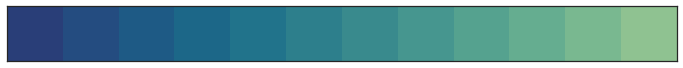

In [96]:
sns.palplot(sns.color_palette("crest_r",12))

In [91]:
def get_html_colors(n):
    p = sns.color_palette("YlGnBu", n)
    p.as_hex()
    
    p = [[int(i * 255) for i in c] for c in p[:]]
    html_p = ["#{0:02x}{1:02x}{2:02x}".format(c[0], c[1], c[2]) for c in p[:]]
    
    return html_p

In [92]:
get_html_colors(20)

['#f8fcc9',
 '#f1f9ba',
 '#e8f6b1',
 '#d9f0b2',
 '#cbeab3',
 '#b2e0b6',
 '#97d6b8',
 '#7cccbb',
 '#64c3be',
 '#4dbac2',
 '#39aec3',
 '#2ca0c1',
 '#1e92c0',
 '#1e80b8',
 '#206cae',
 '#2259a5',
 '#23499e',
 '#243996',
 '#1d2e85',
 '#12256e']

In [70]:
p = sns.color_palette("YlGnBu",10)
p.as_hex()


['#%02x%02x%02x' % c for c in p[:]]

TypeError: %x format: an integer is required, not float

In [ ]:
"#{0:02x}{1:02x}{2:02x}".format(int(c[0] * 255), int(c[1] * 255), int(c[2] * 255))

In [78]:
["#{0:02x}{1:02x}{2:02x}".format(int(c[0] * 255), int(c[1] * 255), int(c[2] * 255)) for c in p[:]]

['#f2f9bc',
 '#dcf1b2',
 '#bbe4b5',
 '#84cfba',
 '#57bec0',
 '#34a8c2',
 '#1d8cbe',
 '#2166ab',
 '#23469c',
 '#1c2d83']

In [72]:
p[0]

(0.9490657439446367, 0.9801922337562476, 0.7377931564782776)

In [67]:
p = sns.color_palette("YlGnBu",10)
p

[(0.9490657439446367, 0.9801922337562476, 0.7377931564782776),
 (0.8633756247597079, 0.946482122260669, 0.6993310265282584),
 (0.7338869665513265, 0.8956401384083045, 0.7104036908881199),
 (0.521291810841984, 0.812964244521338, 0.7310726643598615),
 (0.34262206843521725, 0.7462668204536717, 0.7558938869665514),
 (0.20396770472895037, 0.6613763936947328, 0.762968089196463),
 (0.11534025374855825, 0.552156862745098, 0.7451903114186851),
 (0.1301038062283737, 0.40156862745098043, 0.6743252595155709),
 (0.13988465974625144, 0.27690888119953866, 0.6151480199923107),
 (0.11343329488658209, 0.17880815071126488, 0.514878892733564)]

In [55]:
p = sns.color_palette("flare", as_cmap=True)
p.as_hex()
p[:]

AttributeError: 'ListedColormap' object has no attribute 'as_hex'